This project goes through a dataset for 911 calls, and aims to analyse it, in order to drawn conclusion such as the most frequent reason for calls, or the day of the week and time of the day where the calls occur the most.

The libraries used for this project are as follows
-Pandas
-Numpy
-Matplotlib
-Seaborn

In [1]:
#911 Analysis Project

In [2]:
#imports libraries
import numpy as np
import pandas as pd

In [3]:
#imports graphical libraries
import seaborn as sns
import matplotlib as plt
%matplotlib inline

In [4]:
#reads 911 dataset
df=pd.read_csv('911.csv')

In [5]:
#checking info on df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


In [6]:
#df head
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [7]:
#top 5 zipcodes
df['zip'].value_counts().head(5)

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

In [8]:
#top 5 townships
df['twp'].value_counts().head(5)

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

In [9]:
#unique titles
df['title'].nunique()

110

In [10]:
#Creating new column with the Reason in evidence
x=df['title'].iloc[0].split(':')[0]

In [11]:
#with lambda expression
df['Reason'] = df['title'].apply(lambda title: title.split(':')[0])

In [12]:
df['Reason']

0            EMS
1            EMS
2           Fire
3            EMS
4            EMS
          ...   
99487    Traffic
99488    Traffic
99489        EMS
99490        EMS
99491    Traffic
Name: Reason, Length: 99492, dtype: object

In [13]:
#most common reason
df['Reason'].value_counts()

EMS        48877
Traffic    35695
Fire       14920
Name: Reason, dtype: int64

<AxesSubplot:xlabel='Reason', ylabel='count'>

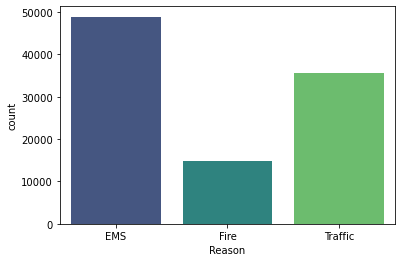

In [14]:
#count plot for 911 calls by reason
sns.countplot(x='Reason',data=df,palette='viridis')

In [15]:
#dat type of time column string
type(df['timeStamp'].iloc[0])

str

In [16]:
#transforming time as string into date time object
df['timeStamp']=pd.to_datetime(df['timeStamp'])

In [17]:
#column is now date timetype
type(df['timeStamp'].iloc[0])

pandas._libs.tslibs.timestamps.Timestamp

In [18]:
#calling attributes from time column and creating new columns for hour, month and day of week

In [19]:
time = df['timeStamp'].iloc[0]

In [20]:
time.year

2015

In [21]:
#creating hour column
df['Hour'] = df['timeStamp'].apply(lambda time: time.hour)

In [22]:
df['Hour']

0        17
1        17
2        17
3        17
4        17
         ..
99487    11
99488    11
99489    11
99490    11
99491    11
Name: Hour, Length: 99492, dtype: int64

In [23]:
#creating year column
df['Year'] = df['timeStamp'].apply(lambda time: time.year)

In [24]:
df['Year']

0        2015
1        2015
2        2015
3        2015
4        2015
         ... 
99487    2016
99488    2016
99489    2016
99490    2016
99491    2016
Name: Year, Length: 99492, dtype: int64

In [25]:
#creating month column
df['Month'] = df['timeStamp'].apply(lambda time: time.month)

In [26]:
df['Month']

0        12
1        12
2        12
3        12
4        12
         ..
99487     8
99488     8
99489     8
99490     8
99491     8
Name: Month, Length: 99492, dtype: int64

In [27]:
#creating day of week column

In [28]:
df['DayOfWeek'] = df['timeStamp'].apply(lambda time: time.dayofweek)

In [29]:
df['DayOfWeek']

0        3
1        3
2        3
3        3
4        3
        ..
99487    2
99488    2
99489    2
99490    2
99491    2
Name: DayOfWeek, Length: 99492, dtype: int64

In [30]:
#mapping the day of week names
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [31]:
df['DayOfWeek'] = df['DayOfWeek'].map(dmap)

In [32]:
df['DayOfWeek']

0        Thu
1        Thu
2        Thu
3        Thu
4        Thu
        ... 
99487    Wed
99488    Wed
99489    Wed
99490    Wed
99491    Wed
Name: DayOfWeek, Length: 99492, dtype: object

In [33]:
#count plot with days of the week

<AxesSubplot:xlabel='DayOfWeek', ylabel='count'>

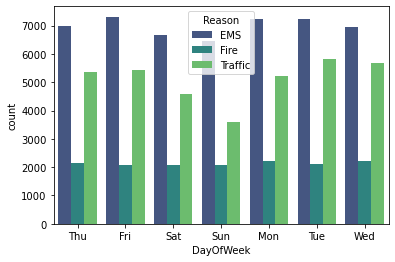

In [34]:
sns.countplot(x='DayOfWeek',data=df,hue='Reason',palette='viridis')


<AxesSubplot:xlabel='Month', ylabel='count'>

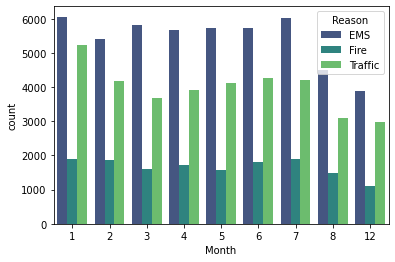

In [35]:
#by month, we noticed that months 9,10 and 11 are missing
sns.countplot(x='Month',data=df,hue='Reason',palette='viridis')

In [38]:
#group by object by month
byMonth = df.groupby('Month').count()

In [40]:
byMonth.head(12)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Year,DayOfWeek
Month,,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326,11326
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423,11423
6,11786,11786,11786,10212,11786,11786,11777,11732,11786,11786,11786,11786,11786
7,12137,12137,12137,10633,12137,12137,12133,12088,12137,12137,12137,12137,12137
8,9078,9078,9078,7832,9078,9078,9073,9025,9078,9078,9078,9078,9078
12,7969,7969,7969,6907,7969,7969,7963,7916,7969,7969,7969,7969,7969


<AxesSubplot:xlabel='Month'>

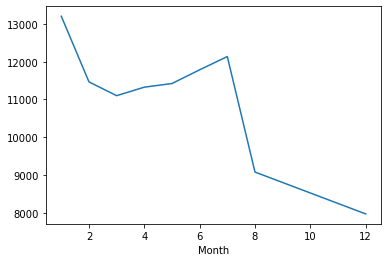

In [42]:
#clearer to see the drop with a line graph
byMonth['lat'].plot()

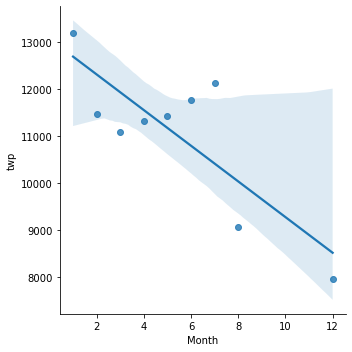

In [44]:
#linear module fit
sns.lmplot(x='Month',y='twp',data=byMonth.reset_index())

In [47]:
#create new column for date
t = df['timeStamp'].iloc[0]

In [48]:
t

Timestamp('2015-12-10 17:40:00')

In [49]:
t.date()

datetime.date(2015, 12, 10)

In [50]:
df['Date'] = df['timeStamp'].apply(lambda t:t.date())

In [52]:
df['Date']

0        2015-12-10
1        2015-12-10
2        2015-12-10
3        2015-12-10
4        2015-12-10
            ...    
99487    2016-08-24
99488    2016-08-24
99489    2016-08-24
99490    2016-08-24
99491    2016-08-24
Name: Date, Length: 99492, dtype: object

<AxesSubplot:xlabel='Date'>

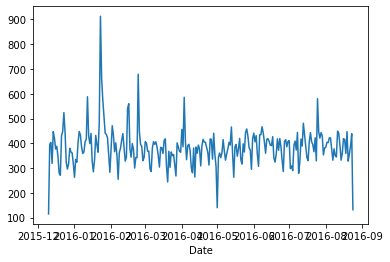

In [59]:
#grouping by the newly created date and creating chart
df.groupby('Date').count()['lat'].plot()

<AxesSubplot:xlabel='Date'>

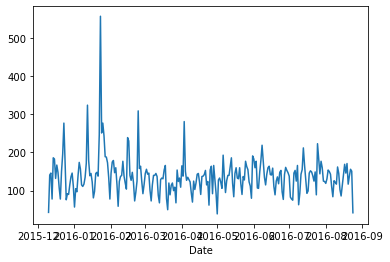

In [60]:
#group by plot for the Reason = Traffic
df[df['Reason']=='Traffic'].groupby('Date').count()['lat'].plot()

<AxesSubplot:xlabel='Date'>

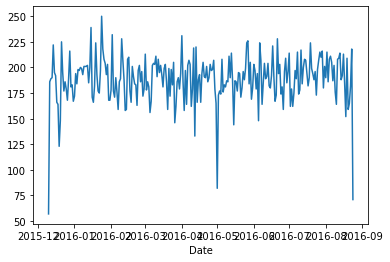

In [61]:
#group by plot for the Reason = EMS
df[df['Reason']=='EMS'].groupby('Date').count()['lat'].plot()

<AxesSubplot:xlabel='Date'>

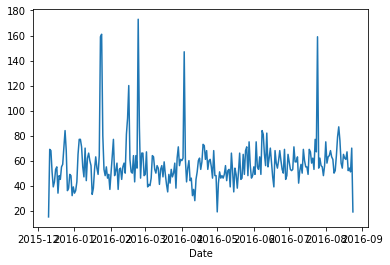

In [62]:
#group by plot for the Reason = Fire
df[df['Reason']=='Fire'].groupby('Date').count()['lat'].plot()

In [68]:
#reestructuring data for heatmapping,multi layer index
df.groupby(by=['DayOfWeek','Hour']).count()

lat  lng  desc  zip  title  timeStamp  twp  addr    e  Reason  \
DayOfWeek Hour                                                                  
Fri       0     275  275   275  248    275        275  275   275  275     275   
          1     235  235   235  200    235        235  235   232  235     235   
          2     191  191   191  165    191        191  191   191  191     191   
          3     175  175   175  164    175        175  175   175  175     175   
          4     201  201   201  184    201        201  201   201  201     201   
...             ...  ...   ...  ...    ...        ...  ...   ...  ...     ...   
Wed       19    686  686   686  590    686        686  686   682  686     686   
          20    668  668   668  597    668        668  668   662  668     668   
          21    575  575   575  508    575        575  574   572  575     575   
          22    490  490   490  432    490        490  490   485  490     490   
          23    335  335   335  294    335        335  334   335  335     335   

                Year  Month  Date  
DayOfWeek Hour                     
Fri       0      275    275   275  
          1      235    235   235  
          2      191    191   191  
          3      175    175   175  
          4      201    201   201  
...              ...    ...   ...  
Wed       19     686    686   686  
          20     668    668   668  
          21     575    575   575  
          22     490    490   490  
          23     335    335   335  

[168 rows x 13 columns]

In [73]:
#matrix form with unstack method
dayHour=df.groupby(by=['DayOfWeek','Hour']).count()['Reason'].unstack()

<AxesSubplot:xlabel='Hour', ylabel='DayOfWeek'>

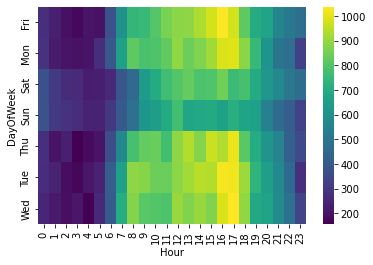

In [76]:
#heatmap
sns.heatmap(dayHour,cmap='viridis')

<AxesSubplot:xlabel='Hour', ylabel='Month'>

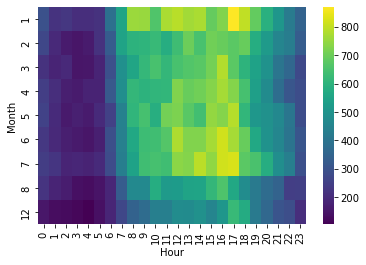

In [78]:
#by month
dayMonth=df.groupby(by=['Month','Hour']).count()['Reason'].unstack()
sns.heatmap(dayMonth,cmap='viridis')

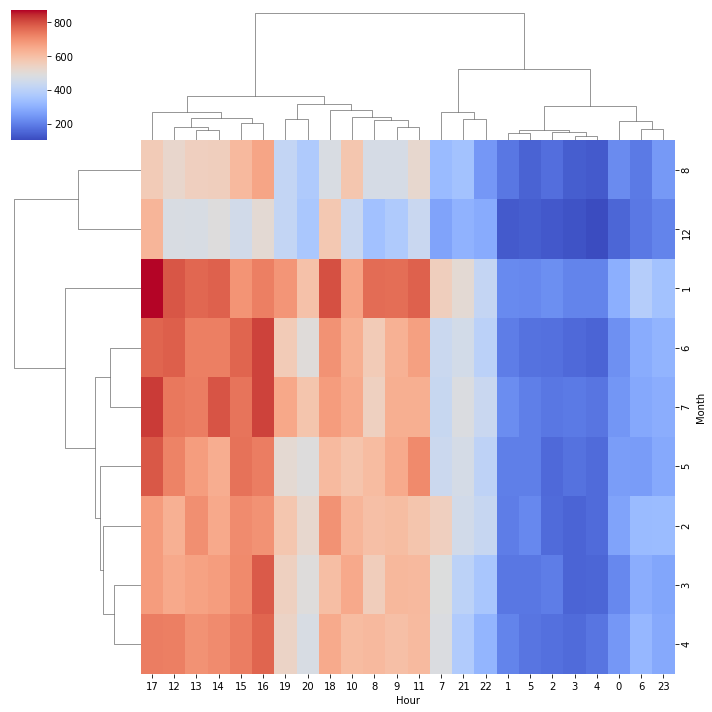

In [80]:
sns.clustermap(dayMonth,cmap='coolwarm')